In [47]:
!pip install --upgrade scipy networkx

In [48]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [49]:
G = nx.Graph()

In [50]:
G.graph["Name"] = ["Test"]  #adding attributes to the graph
G.graph["feature"] = ["Colors"]

In [51]:
G.graph

{'Name': ['Test'], 'feature': ['Colors']}

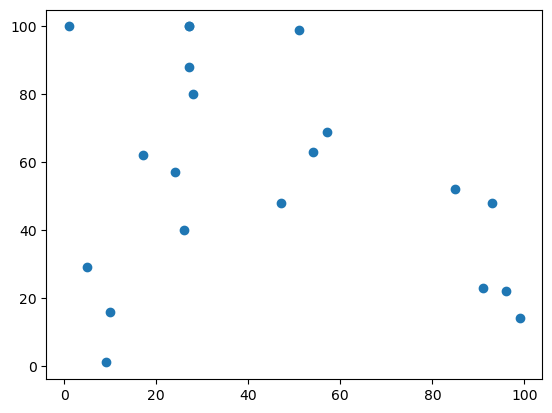

In [52]:
x = []
y = []
for _ in range(20):
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))

plt.scatter(x, y)
plt.show()

In [53]:
for i in range(0,20):
  G.add_node(i+1,label = i+1,pos = (x[i],y[i]))

In [54]:
for node in G.nodes(data=True):
  print(node)

(1, {'label': 1, 'pos': (27, 88)})
(2, {'label': 2, 'pos': (17, 62)})
(3, {'label': 3, 'pos': (93, 48)})
(4, {'label': 4, 'pos': (54, 63)})
(5, {'label': 5, 'pos': (85, 52)})
(6, {'label': 6, 'pos': (26, 40)})
(7, {'label': 7, 'pos': (47, 48)})
(8, {'label': 8, 'pos': (91, 23)})
(9, {'label': 9, 'pos': (9, 1)})
(10, {'label': 10, 'pos': (96, 22)})
(11, {'label': 11, 'pos': (28, 80)})
(12, {'label': 12, 'pos': (57, 69)})
(13, {'label': 13, 'pos': (27, 100)})
(14, {'label': 14, 'pos': (51, 99)})
(15, {'label': 15, 'pos': (27, 100)})
(16, {'label': 16, 'pos': (5, 29)})
(17, {'label': 17, 'pos': (1, 100)})
(18, {'label': 18, 'pos': (99, 14)})
(19, {'label': 19, 'pos': (24, 57)})
(20, {'label': 20, 'pos': (10, 16)})


In [55]:
pos=nx.get_node_attributes(G,'pos')


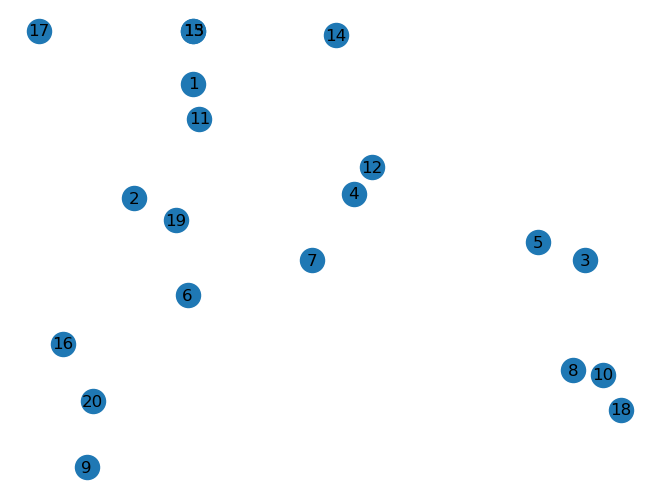

In [56]:
nx.draw(G,pos,with_labels=True,node_size=300)

In [57]:
import math

In [58]:
for i in range(0,20):
  for j in range (i):
    p=G.nodes[i+1]['pos']
    q=G.nodes[j+1]['pos']
    if(math.dist(p,q)<=25):
      G.add_edge(i+1,j+1)

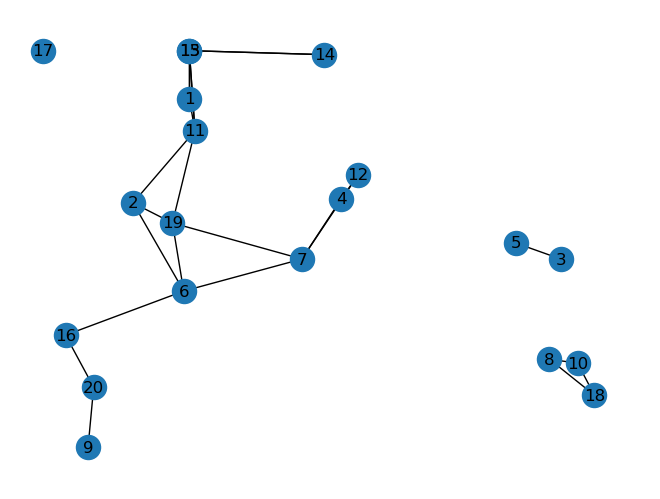

In [59]:
nx.draw(G,pos,with_labels=True)

In [60]:
import numpy as np

In [61]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0.

In [62]:
V=20
def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    print(" ".join(map(str, color)))

def is_safe(v, graph, color, c):
    # Check if the color 'c' is safe for the vertex 'v'
    for i in range(V):
        if graph[v][i] and c == color[i]:
            return False
    return True

def graph_coloring_util(graph, m, color, v):
    # Base case: If all vertices are assigned a color, return true
    if v == V:
        return True

    # Try different colors for the current vertex 'v'
    for c in range(1, m + 1):
        # Check if assignment of color 'c' to 'v' is fine
        if is_safe(v, graph, color, c):
            color[v] = c

            # Recur to assign colors to the rest of the vertices
            if graph_coloring_util(graph, m, color, v + 1):
                return True

            # If assigning color 'c' doesn't lead to a solution, remove it
            color[v] = 0

    # If no color can be assigned to this vertex, return false
    return False

def graph_coloring(graph, m):
    color = [0] * V

    # Call graph_coloring_util() for vertex 0
    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False

    # Print the solution
    print_solution(color)
    return color



m = 5
# Function call
color_array = graph_coloring(adj_matrix, m)

Solution Exists: Following are the assigned colors
1 1 1 1 2 2 3 1 1 2 2 2 3 1 4 1 1 3 4 2


In [63]:
color_array[18]

4

In [64]:
for i in range(0,20):
  G.nodes[i+1]['colour_val'] = color_array[i]

In [65]:
for node in G.nodes(data=True):
  print(node)

(1, {'label': 1, 'pos': (27, 88), 'colour_val': 1})
(2, {'label': 2, 'pos': (17, 62), 'colour_val': 1})
(3, {'label': 3, 'pos': (93, 48), 'colour_val': 1})
(4, {'label': 4, 'pos': (54, 63), 'colour_val': 1})
(5, {'label': 5, 'pos': (85, 52), 'colour_val': 2})
(6, {'label': 6, 'pos': (26, 40), 'colour_val': 2})
(7, {'label': 7, 'pos': (47, 48), 'colour_val': 3})
(8, {'label': 8, 'pos': (91, 23), 'colour_val': 1})
(9, {'label': 9, 'pos': (9, 1), 'colour_val': 1})
(10, {'label': 10, 'pos': (96, 22), 'colour_val': 2})
(11, {'label': 11, 'pos': (28, 80), 'colour_val': 2})
(12, {'label': 12, 'pos': (57, 69), 'colour_val': 2})
(13, {'label': 13, 'pos': (27, 100), 'colour_val': 3})
(14, {'label': 14, 'pos': (51, 99), 'colour_val': 1})
(15, {'label': 15, 'pos': (27, 100), 'colour_val': 4})
(16, {'label': 16, 'pos': (5, 29), 'colour_val': 1})
(17, {'label': 17, 'pos': (1, 100), 'colour_val': 1})
(18, {'label': 18, 'pos': (99, 14), 'colour_val': 3})
(19, {'label': 19, 'pos': (24, 57), 'colour_val

In [66]:
color_attr = {node : G.nodes[node]['colour'] for node in G.nodes}
nx.draw(G,pos,with_labels=True,labels = color_attr)

KeyError: 'colour'

In [67]:
node_colors = [G.nodes[node]['colour'] for node in G.nodes]
node_colors

KeyError: 'colour'

In [68]:
colors = ['red','yellow','blue','green','pink']

In [69]:
for i in range(0,20):
  G.nodes[i+1]['color'] = colors[G.nodes[i+1]['colour']-1]

KeyError: 'colour'

In [70]:
for node in G.nodes(data=True):
  print(node)

(1, {'label': 1, 'pos': (27, 88), 'colour_val': 1})
(2, {'label': 2, 'pos': (17, 62), 'colour_val': 1})
(3, {'label': 3, 'pos': (93, 48), 'colour_val': 1})
(4, {'label': 4, 'pos': (54, 63), 'colour_val': 1})
(5, {'label': 5, 'pos': (85, 52), 'colour_val': 2})
(6, {'label': 6, 'pos': (26, 40), 'colour_val': 2})
(7, {'label': 7, 'pos': (47, 48), 'colour_val': 3})
(8, {'label': 8, 'pos': (91, 23), 'colour_val': 1})
(9, {'label': 9, 'pos': (9, 1), 'colour_val': 1})
(10, {'label': 10, 'pos': (96, 22), 'colour_val': 2})
(11, {'label': 11, 'pos': (28, 80), 'colour_val': 2})
(12, {'label': 12, 'pos': (57, 69), 'colour_val': 2})
(13, {'label': 13, 'pos': (27, 100), 'colour_val': 3})
(14, {'label': 14, 'pos': (51, 99), 'colour_val': 1})
(15, {'label': 15, 'pos': (27, 100), 'colour_val': 4})
(16, {'label': 16, 'pos': (5, 29), 'colour_val': 1})
(17, {'label': 17, 'pos': (1, 100), 'colour_val': 1})
(18, {'label': 18, 'pos': (99, 14), 'colour_val': 3})
(19, {'label': 19, 'pos': (24, 57), 'colour_val

In [71]:
for node in G.nodes:
  del G.nodes[node]['colour_val']

In [72]:
for node in G.nodes(data=True):
  print(node)

(1, {'label': 1, 'pos': (27, 88)})
(2, {'label': 2, 'pos': (17, 62)})
(3, {'label': 3, 'pos': (93, 48)})
(4, {'label': 4, 'pos': (54, 63)})
(5, {'label': 5, 'pos': (85, 52)})
(6, {'label': 6, 'pos': (26, 40)})
(7, {'label': 7, 'pos': (47, 48)})
(8, {'label': 8, 'pos': (91, 23)})
(9, {'label': 9, 'pos': (9, 1)})
(10, {'label': 10, 'pos': (96, 22)})
(11, {'label': 11, 'pos': (28, 80)})
(12, {'label': 12, 'pos': (57, 69)})
(13, {'label': 13, 'pos': (27, 100)})
(14, {'label': 14, 'pos': (51, 99)})
(15, {'label': 15, 'pos': (27, 100)})
(16, {'label': 16, 'pos': (5, 29)})
(17, {'label': 17, 'pos': (1, 100)})
(18, {'label': 18, 'pos': (99, 14)})
(19, {'label': 19, 'pos': (24, 57)})
(20, {'label': 20, 'pos': (10, 16)})


In [73]:
nx.draw(G,pos,with_labels=True,node_color=[G.nodes[node]['color'] for node in G.nodes])

KeyError: 'color'

HETEROGENOUS GRAPHS

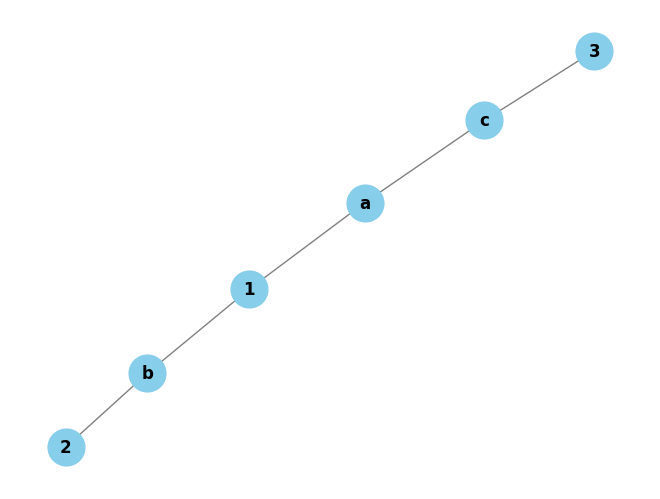

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes of Type A
nodes_type_a = [1, 2, 3]
G.add_nodes_from(nodes_type_a, node_type='USER')

# Add nodes of Type B
nodes_type_b = ['a', 'b', 'c']
G.add_nodes_from(nodes_type_b, node_type='ACCESS_POINT')

# Add edges of Edge Type 1
edges_type_1 = [(1, 'a'), (2, 'b')]
G.add_edges_from(edges_type_1, edge_type='Type1')

# Add edges of Edge Type 2
edges_type_2 = [(1, 'b'), (3, 'c')]
G.add_edges_from(edges_type_2, edge_type='Type2')

# Add edges of Edge Type 3
edges_type_3 = [('a', 'c')]
G.add_edges_from(edges_type_3, edge_type='Type3')

# Visualize the graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_color='black', node_size=700, edge_color='gray')

# Show the plot
plt.show()


ValueError: Unrecognized marker style ['o', 'o', 'o', '^', '^', '^']

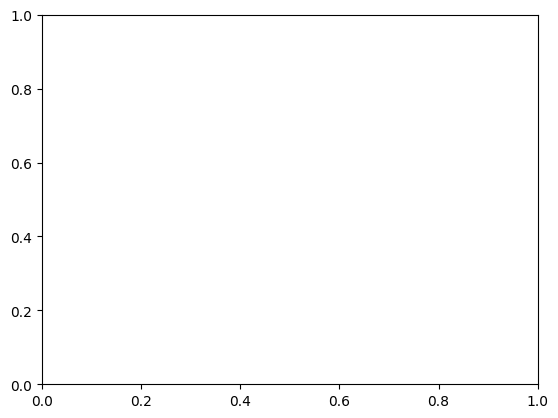

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes of Type A
nodes_type_a = [1, 2, 3]
G.add_nodes_from(nodes_type_a, node_type='A')

# Add nodes of Type B
nodes_type_b = ['a', 'b', 'c']
G.add_nodes_from(nodes_type_b, node_type='B')

# Add edges of Edge Type 1
edges_type_1 = [(1, 'a'), (2, 'b')]
G.add_edges_from(edges_type_1, edge_type='Type1')

# Add edges of Edge Type 2
edges_type_2 = [(1, 'b'), (3, 'c')]
G.add_edges_from(edges_type_2, edge_type='Type2')

# Add edges of Edge Type 3
edges_type_3 = [('a', 'c')]
G.add_edges_from(edges_type_3, edge_type='Type3')

# Define shapes for nodes
node_shapes = {'A': 'o', 'B': '^'}

# Define colors for edges
edge_colors = {'Type1': 'red', 'Type2': 'green', 'Type3': 'blue'}

# Visualize the graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed

# Draw nodes with different shapes based on node type
node_shapes_list = [node_shapes[data['node_type']] for node, data in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700, nodelist=G.nodes(), node_shape=node_shapes_list)

# Draw edges with different colors based on edge type
edge_colors_list = [edge_colors[data['edge_type']] for u, v, data in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors_list)

# Draw labels
nx.draw_networkx_labels(G, pos, font_weight='bold')

# Show the plot
plt.show()
